In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

import statsmodels.formula.api as smf

# Load data

In [2]:
report_folder = "Reports"
report_name = "wandb_export_2022-11-30T13_20_48.820-05_00.csv"
# sweep_name = "20221004-ecg_p40-sup-clocs1d-bayes-norm01-wd-b4.yaml"
report_df = pd.read_csv(os.path.join(report_folder, report_name))
report_df

,Name,State,Created,End Time,Runtime,Hostname,ID,lr,classifier_lr,embedding_dim,...,dim_feedforward,dropout,n_length,nhead,num_layers,use_raw_patch,train_auroc,val_auroc,test_auroc,epoch
0,supervised-clocsCNN_1D-ECG_normalized-20221128...,finished,2022-11-29T06:52:58.000Z,2022-11-29T08:47:35.000Z,6877,beast4,69ipak33,0.005,0.001,256,...,128.0,0.1,300.0,1.0,3.0,False,0.761352,0.876839,0.954102,59.0
1,supervised-clocsCNN_1D-ECG_normalized-20221128...,finished,2022-11-29T19:30:31.000Z,2022-11-30T00:29:11.000Z,17920,beast4,k1kblf1l,0.005,0.001,256,...,128.0,0.1,300.0,1.0,3.0,False,0.751238,0.890093,0.952896,101.0
2,supervised-clocsCNN_1D-ECG_normalized-20221128...,finished,2022-11-28T23:42:56.000Z,2022-11-29T02:39:35.000Z,10599,ankitlab2,2re5x6mw,0.005,0.001,256,...,128.0,0.1,300.0,1.0,3.0,False,0.782273,0.715518,0.950642,61.0
3,supervised-clocsCNN_1D-ECG_normalized-20221128...,finished,2022-11-28T23:42:55.000Z,2022-11-29T02:28:06.000Z,9911,ankitlab2,p5xik4s9,0.001,0.001,256,...,128.0,0.1,300.0,1.0,3.0,False,0.771941,0.534769,0.950412,63.0
4,supervised-clocsCNN_1D-ECG_normalized-20221128...,finished,2022-11-30T00:16:12.000Z,2022-11-30T07:09:47.000Z,24815,beast3,jisua149,0.001,0.001,256,...,128.0,0.1,300.0,1.0,3.0,False,0.756042,0.902752,0.950245,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,supervised-clocsCNN_1D-ECG_normalized-20221128...,running,2022-11-30T09:43:01.000Z,2022-11-30T18:20:40.000Z,31059,ankitlab2,umqtnx51,0.005,0.001,256,...,128.0,0.1,300.0,1.0,3.0,False,0.741201,0.925146,NaN,47.0
356,supervised-clocsCNN_1D-ECG_normalized-20221128...,running,2022-11-30T06:10:56.000Z,2022-11-30T18:20:27.000Z,43771,ankitlab2,yacezhb7,0.005,0.010,256,...,128.0,0.1,300.0,1.0,3.0,False,0.747864,0.939965,NaN,74.0
357,supervised-clocsCNN_1D-ECG_normalized-20221128...,running,2022-11-30T13:17:49.000Z,2022-11-30T18:20:31.000Z,18162,ankitlab2,yg7fvh1w,0.005,0.010,256,...,128.0,0.1,300.0,1.0,3.0,False,0.748501,0.904716,NaN,26.0
358,supervised-clocsCNN_1D-ECG_normalized-20221128...,running,2022-11-30T08:23:00.000Z,2022-11-30T18:20:33.000Z,35853,ankitlab2,yuh10rwl,0.001,0.001,256,...,128.0,0.1,300.0,1.0,3.0,False,0.743373,0.884405,NaN,56.0


In [4]:
for column in ["lr", "classifier_lr", "optimizer", "aug_prob", "seed"]:
    print(column, len(report_df[column].unique()), report_df[column].unique())

lr 2 [0.005 0.001]
classifier_lr 2 [0.001 0.01 ]
optimizer 2 ['adam' 'sgd']
aug_prob 9 [0.75 1.5  0.   1.75 0.25 1.   1.25 2.   0.5 ]
seed 5 [4 2 1 3 0]


# Analyze Results

In [41]:
selected_columns = ["lr", "classifier_lr", "optimizer", "aug_prob", "seed", "test_auroc"]
report_df_selected = report_df[selected_columns]

In [42]:
report_df_selected

,lr,classifier_lr,optimizer,aug_prob,seed,test_auroc
0,0.005,0.001,adam,0.75,4,0.954102
1,0.005,0.001,adam,1.50,2,0.952896
2,0.005,0.001,adam,0.00,2,0.950642
3,0.001,0.001,adam,0.00,1,0.950412
4,0.001,0.001,adam,1.75,2,0.950245
...,...,...,...,...,...,...
355,0.005,0.001,adam,2.00,2,NaN
356,0.005,0.010,adam,1.75,3,NaN
357,0.005,0.010,sgd,2.00,3,NaN
358,0.001,0.001,sgd,2.00,1,NaN


## Find the best performing subgroup with the same `lr`, `claasifier_lr` and `optimizer`

In [9]:
report_df_selected_summary = report_df_selected.groupby(["lr", "classifier_lr", "optimizer"]).agg({"test_auroc": "mean"})
report_df_selected_summary_sorted = report_df_selected_summary.sort_values(by=["test_auroc"], ascending=False)
best_lr = report_df_selected_summary_sorted.reset_index()["lr"].values[0]
best_classifier_lr = report_df_selected_summary_sorted.reset_index()["classifier_lr"].values[0]
best_optimizer = report_df_selected_summary_sorted.reset_index()["optimizer"].values[0]
# best_lr, best_classifier_lr, best_optimizer
report_df_selected_summary_sorted

test_auroc
lr    classifier_lr optimizer            
0.001 0.010         adam         0.931463
0.005 0.001         adam         0.930387
      0.010         adam         0.927913
0.001 0.001         adam         0.922659
0.005 0.001         sgd          0.901724
0.001 0.001         sgd          0.885545
      0.010         sgd          0.882666
0.005 0.010         sgd          0.881915

In [24]:
report_df_selected_filtered = report_df_selected.query(
    f"lr == {best_lr} and classifier_lr == {best_classifier_lr} and optimizer == '{best_optimizer}'").reset_index(drop=True)
report_df_selected_filtered = report_df_selected_filtered.sort_values(by=["aug_prob", "seed"])
report_df_selected_filtered


,lr,classifier_lr,optimizer,aug_prob,seed,test_auroc
19,0.001,0.01,adam,0.00,0,0.933147
26,0.001,0.01,adam,0.00,1,0.930417
3,0.001,0.01,adam,0.00,2,0.943203
8,0.001,0.01,adam,0.00,3,0.939048
11,0.001,0.01,adam,0.00,4,0.938330
40,0.001,0.01,adam,0.25,0,0.907868
6,0.001,0.01,adam,0.25,1,0.939812
28,0.001,0.01,adam,0.25,2,0.928312
23,0.001,0.01,adam,0.25,3,0.931643
4,0.001,0.01,adam,0.25,4,0.941397


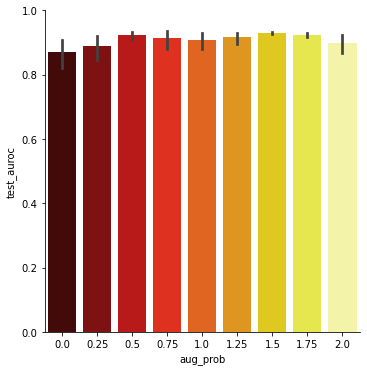

In [37]:
g = sns.catplot(data=report_df_selected,
                x="aug_prob", y="test_auroc",
                kind="bar", palette="hot")
for ax_row in g.axes:
    for ax in ax_row:
        ax.set_ylim(0, 1.0)

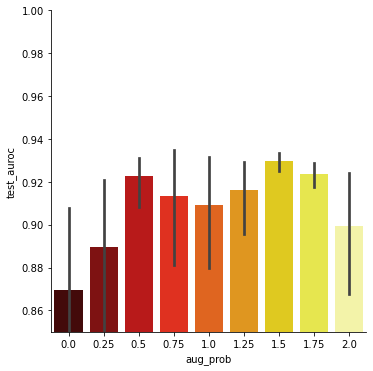

In [38]:
g = sns.catplot(data=report_df_selected,
                x="aug_prob", y="test_auroc",
                kind="bar", palette="hot")
for ax_row in g.axes:
    for ax in ax_row:
        ax.set_ylim(0.85, 1.0)

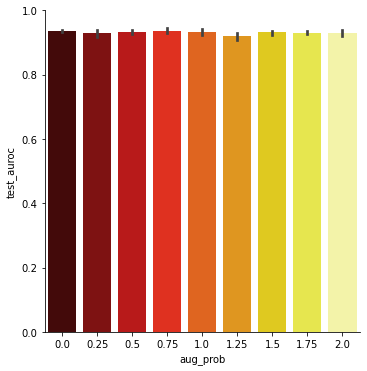

In [39]:
g = sns.catplot(data=report_df_selected_filtered,
                x="aug_prob", y="test_auroc",
                kind="bar", palette="hot")
for ax_row in g.axes:
    for ax in ax_row:
        ax.set_ylim(0, 1.0)

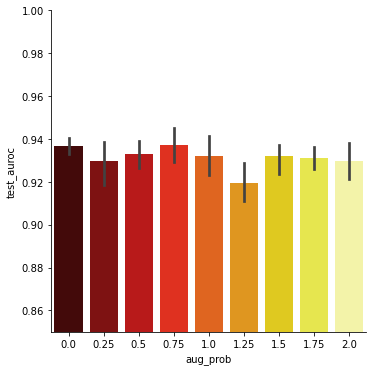

In [40]:
g = sns.catplot(data=report_df_selected_filtered,
                x="aug_prob", y="test_auroc",
                kind="bar", palette="hot")
for ax_row in g.axes:
    for ax in ax_row:
        ax.set_ylim(0.85, 1.0)

## Find the best performing subgroup with the same `lr`, `claasifier_lr`, `optimizer` and 'aug_prob'

In [28]:
selected_columns = ["lr", "classifier_lr", "optimizer", "aug_prob", "seed", "test_auroc"]
report_df_selected = report_df[selected_columns]
report_df_selected_summary = report_df_selected.groupby(["lr", "classifier_lr", "optimizer", "aug_prob"]).agg({"test_auroc": "mean"})
report_df_selected_summary_sorted = report_df_selected_summary.sort_values(by=["test_auroc"], ascending=False)
best_lr = report_df_selected_summary_sorted.reset_index()["lr"].values[0]
best_classifier_lr = report_df_selected_summary_sorted.reset_index()["classifier_lr"].values[0]
best_optimizer = report_df_selected_summary_sorted.reset_index()["optimizer"].values[0]
# best_lr, best_classifier_lr, best_optimizer
report_df_selected_summary_sorted

test_auroc
lr    classifier_lr optimizer aug_prob            
0.005 0.010         sgd       1.50        0.940074
      0.001         sgd       0.75        0.938018
0.001 0.010         adam      0.75        0.937331
                              0.00        0.936829
0.005 0.001         adam      0.00        0.936603
...                                            ...
      0.010         sgd       0.25        0.831250
      0.001         sgd       0.00        0.816773
0.001 0.001         sgd       0.75        0.772671
      0.010         sgd       0.25        0.761530
0.005 0.010         sgd       0.00        0.673477

[72 rows x 1 columns]

# Summarize Report

In [8]:
report_df_summary = report_df.groupby(["embedding_dim", "weight_decay", "lr", "classifier_lr"]).agg({
    "val_auroc": "mean"
}).reset_index()
report_df_summary

,embedding_dim,weight_decay,lr,classifier_lr,val_auroc
0,64,0.00000,0.001,0.0001,0.610765
1,64,0.00000,0.001,0.0010,0.509818
2,64,0.00000,0.001,0.0100,0.630346
3,64,0.00000,0.001,0.1000,0.609357
4,64,0.00001,0.001,0.0001,0.587884
5,64,0.00001,0.001,0.0010,0.696220
6,64,0.00001,0.001,0.0100,0.610336
7,64,0.00001,0.001,0.1000,0.723791
8,64,0.00100,0.001,0.0001,0.656305
9,64,0.00100,0.001,0.0010,0.670421


In [16]:
report_df.sort_values(by=["val_auroc"], ascending=False).head(32)

,Name,Agent,Runtime,Notes,Tags,embedding_dim,seed,weight_decay,lr,classifier_lr,train_acc1_epoch,train_acc1_step,train_auroc,train_loss_epoch,train_loss_step,val_acc1,val_auroc,val_loss
103,rosy-sweep-197,3bee37l0,1419,Best Validation AUROC,NaN,512,0,0.00001,0.001,0.0010,98.618950,99.218750,0.995787,0.050136,0.045221,76.763634,0.926179,0.633099
281,effortless-sweep-19,qbzyurfc,1646,-,NaN,128,1,0.00000,0.001,0.1000,98.293221,99.218750,0.994583,0.060295,0.035211,84.283257,0.919668,0.730677
263,stellar-sweep-37,ojphj482,1390,-,NaN,256,2,0.00000,0.001,0.1000,98.282509,99.218750,0.994512,0.060814,0.043893,75.900543,0.890928,1.663412
191,lilac-sweep-109,qbzyurfc,1413,-,NaN,256,1,0.00000,0.001,0.0100,98.674713,99.218750,0.996090,0.048178,0.052918,87.500839,0.888121,0.688186
280,chocolate-sweep-20,knrpna6r,1606,-,NaN,128,1,0.00001,0.001,0.1000,98.514679,98.437500,0.995674,0.052394,0.053013,73.078728,0.886088,0.563789
286,smart-sweep-14,3bee37l0,1545,-,NaN,64,4,0.00001,0.001,0.1000,98.508064,99.218750,0.995622,0.052907,0.034234,78.210320,0.884282,0.800281
113,stilted-sweep-187,3bee37l0,1453,-,NaN,256,2,0.00000,0.001,0.0010,98.692352,98.046875,0.996112,0.047904,0.048881,76.857544,0.875486,0.750637
138,vocal-sweep-162,3bee37l0,1423,-,NaN,64,3,0.00100,0.001,0.0010,98.515312,99.609375,0.995678,0.052081,0.033141,76.958168,0.870359,0.567267
53,fluent-sweep-247,qbzyurfc,1469,-,NaN,128,2,0.00000,0.001,0.0001,98.662743,98.828125,0.996059,0.047629,0.032415,82.118820,0.862764,0.628047
294,avid-sweep-6,m8e5neie,1547,-,NaN,64,1,0.00100,0.001,0.1000,98.346771,99.218750,0.993788,0.063085,0.038325,90.239922,0.855586,0.474847


/Users/yj31/opt/anaconda3/envs/jpy3.7/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


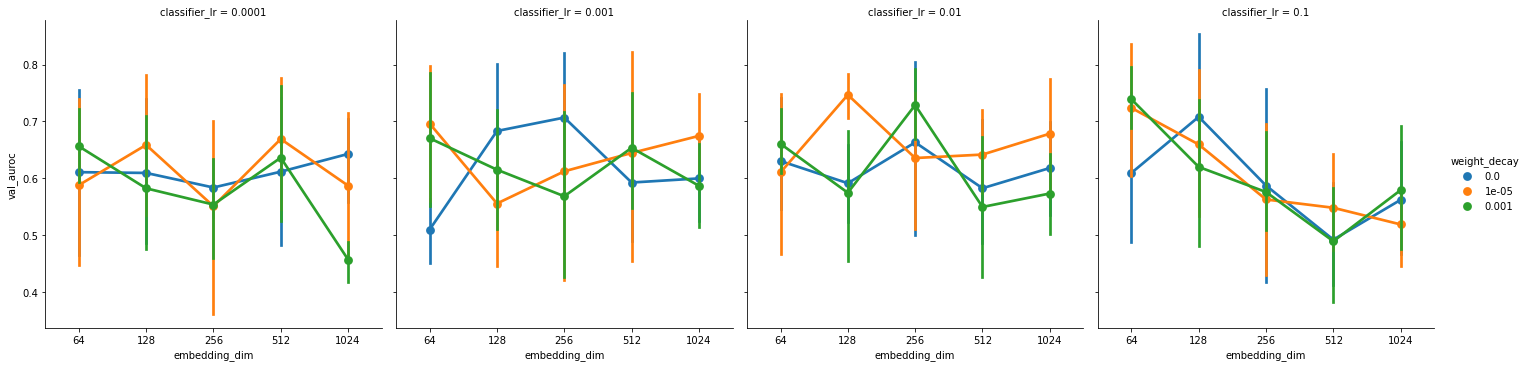

In [9]:
g = sns.factorplot(data=report_df, x="embedding_dim", y="val_auroc", hue="weight_decay", col="classifier_lr")

In [11]:
model = smf.ols("val_auroc ~ embedding_dim + classifier_lr + weight_decay", report_df, ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              val_auroc   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.197
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0885
Time:                        16:43:09   Log-Likelihood:                 160.04
No. Observations:                 300   AIC:                            -312.1
Df Residuals:                     296   BIC:                            -297.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6450      0.015     43.392      0.000       0.616       0.674
embedding_dim -5.217e-05   2.36e-05     -2.208      0.028   -9.87e-05   -5.67e-06
classifier_lr    -0.1924      0.197     -0.977      0.330      -0.580       0.195
weight_decay    -15.3575     17.587     -0.873      0.383     -49.969      19.255
==============================================================================
Omnibus:                       21.478   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.106
Skew:                          -0.074   Prob(JB):                       0.0174
Kurtosis:                       2.209   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
report_df_tmp = report_df.copy()
report_df_tmp["weight_decay"] = report_df_tmp["weight_decay"] + 1e-7
model = smf.ols("val_auroc ~ np.log(embedding_dim) + np.log(classifier_lr) + np.log(weight_decay)", report_df_tmp, ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              val_auroc   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.106
Date:                Wed, 05 Oct 2022   Prob (F-statistic):             0.0995
Time:                        16:44:19   Log-Likelihood:                 159.91
No. Observations:                 300   AIC:                            -311.8
Df Residuals:                     296   BIC:                            -297.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7233      0.057     12.734      0.000       0.612       0.835
np.log(embedding_dim)    -0.0210      0.008     -2.495      0.013      -0.038      -0.004
np.log(classifier_lr)     0.0001      0.003      0.043      0.966      -0.006       0.006
np.log(weight_decay)     -0.0007      0.002     -0.306      0.760      -0.005       0.004
==============================================================================
Omnibus:                       24.694   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.607
Skew:                          -0.050   Prob(JB):                       0.0135
Kurtosis:                       2.176   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""